<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Confidence Intervals for Statistical Measurements

_Authors: Kiefer Katovich (SF) and Matt Brems (DC)_

---

### Lesson Guide
- [Review of Sample Statistics and Parameters](#review-statistics-parameters)
- [The Standard Error](#standard-error)
- [The CLT and Uncertainty of the Sample Mean](#clt-uncertainty)
- [Confidence Intervals](#confidence-intervals)
- [Interpreting the Confidence Interval](#interpreting-ci)



In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='review-statistics-parameters'></a>

### Review and Introduction: Statistics Surrounding the Ages of Single People

---

Below is a random sample of data about age taken from a survey conducted by a bank. The data is specifically subset to people who have classified themselves as "single" as opposed to "married." 

We are interested in describing our sample using **descriptive statistics**. We are also interested in making statements about the overall population that the sample was drawn from (i.e., all single people who would conceivably take the bank survey) using **inferential statistics**.

In [3]:
single = np.array([24, 26, 35, 32, 38, 35, 31, 43, 40, 42, 39, 48, 37, 27, 33, 33, 34,
                   37, 33, 26, 30, 30, 30, 31, 33, 35, 43, 30, 35, 26, 23, 27, 54, 35,
                   29, 28, 37, 33, 34, 32, 29, 43, 29, 36, 36, 34, 39, 33, 30, 32, 23,
                   30, 31, 38, 35, 22, 59, 20, 45, 33, 35, 33, 23, 58, 33, 30, 38, 28,
                   50, 31, 38, 42, 41, 33, 29, 29, 31, 30, 28, 27, 29, 38, 36, 56, 36,
                   31, 30, 29, 25, 41, 47, 34, 38, 50, 23, 28, 35, 32, 36, 28, 39, 33,
                   25, 36, 27, 30, 29, 42, 43, 20, 26, 53, 41, 27, 31, 33, 38, 37, 31,
                   28, 25, 47, 38, 41, 26, 26, 25, 32, 32, 23, 31, 51, 49, 32, 48, 44,
                   30, 31, 34, 37, 31, 32, 24, 38, 38, 39, 29, 25, 29, 31, 24, 35, 28,
                   24, 24, 35, 36, 21, 56, 54, 28, 32, 27, 30, 31, 31, 27, 32, 30, 29,
                   27, 26, 36, 27, 32, 32, 38, 41, 33, 33, 26, 29, 27, 42, 35, 32, 35,
                   43, 32, 22, 32, 37, 30, 39, 28, 33, 25, 34, 39, 31])

Plotting a histogram can provide an effective visual description of the data before we even calculate any statistical measures.

**The following code plots the histogram for the distribution of ages using `matplotlib` and `seaborn`.**

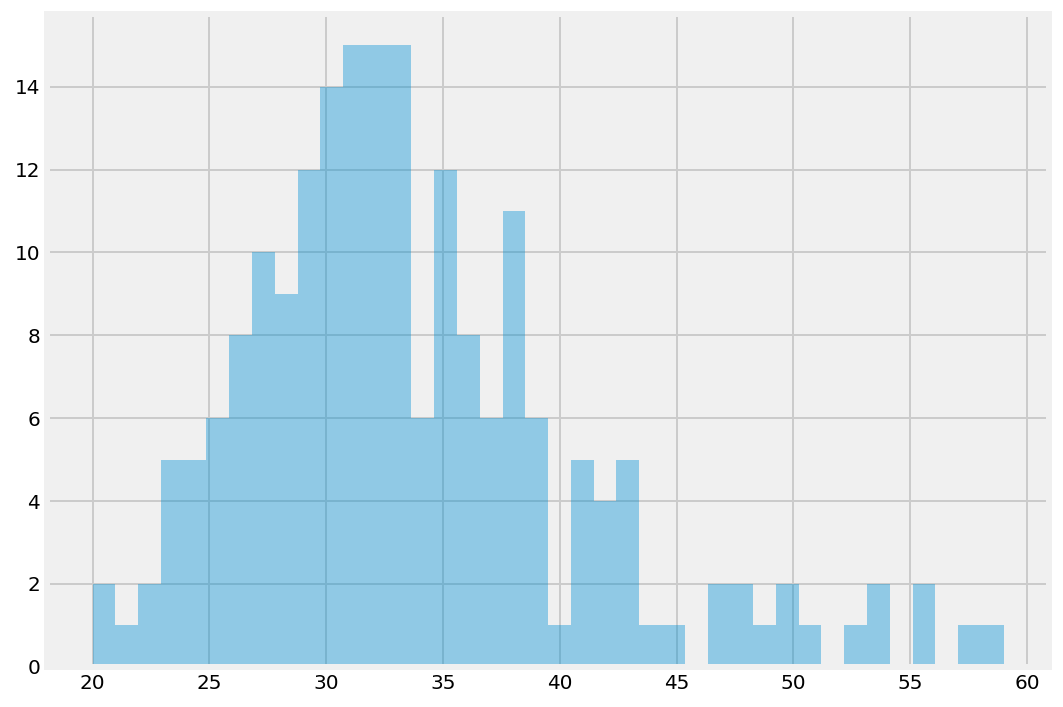

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(single, bins=40, kde=False)

**Calculate the mean and the standard deviation of the data. What do these statistics tell us specifically?**

In [5]:
print(np.mean(single))
print(np.std(single, ddof=1))

33.555
7.47975324076


_This tells us that the mean of our sample is 33.55 years old._   
_The standard deviation, which is the approximate average distance of any 
observed age from the mean age, is 7.46 years._ 

<a id='standard-error'></a>

### The Standard Error of a Statistic

---

The calculation for the standard error of the sample mean is:

### $$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} \approx \frac{s}{\sqrt{n}}$$

Here, $\sigma$ is the population standard deviation (which we will approximate with the sample standard deviation) and $n$ is the sample size.

**Now, let's manually calculate the standard error of the sample mean for our ages.**

In [6]:
se = np.std(single, ddof=1)/np.sqrt(len(single))
se

0.52889842381459962

<a id='clt-uncertainty'></a>

### The CLT and Uncertainty of the Sample Mean

---

Recall that the central limit theorem dictates that the distribution of sample means (calculated across different random samples from our overall population) will be normally distributed. 

### $$ \bar{X} \text{ ~ } N(\mu, \frac{\sigma}{\sqrt{n}} ) \approx N(\bar{x}, \frac{s}{\sqrt{n}} )$$



i.e., **$\bar{X}$** has a standard normal distribution( $N$ ) with a mean of $\bar{x}$ and standard deviation of $\frac{s_{x}}{\sqrt{n}}$ .

**The code below visualizes this distribution with `matplotlib` and `scipy`.**

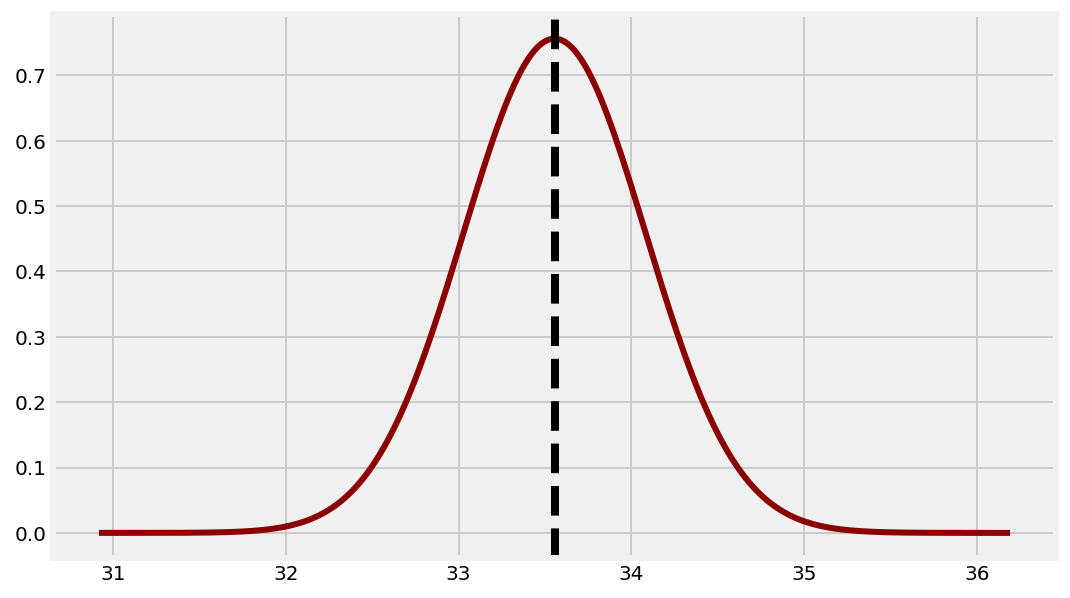

In [8]:
single_mean = np.mean(single)
single_sem = np.std(single)/np.sqrt(len(single))

# Generate points on the x axis:
xpoints = np.linspace(single_mean - single_sem*5, single_mean + single_sem*5, 250)
xpoints

# Use stats.norm.pdf to get values on the probability density function for the normal distribution:
ypoints = stats.norm.pdf(xpoints, single_mean, single_sem)
ypoints

# Initialize a matplotlib "figure:"
fig = plt.figure(figsize=(8,5))

# Get the current "axis" out of the figure:
ax = fig.gca()

# Plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
ax.axvline(single_mean, linewidth=4, ls='dashed', c='black')

**What does this look like for our original distribution?**

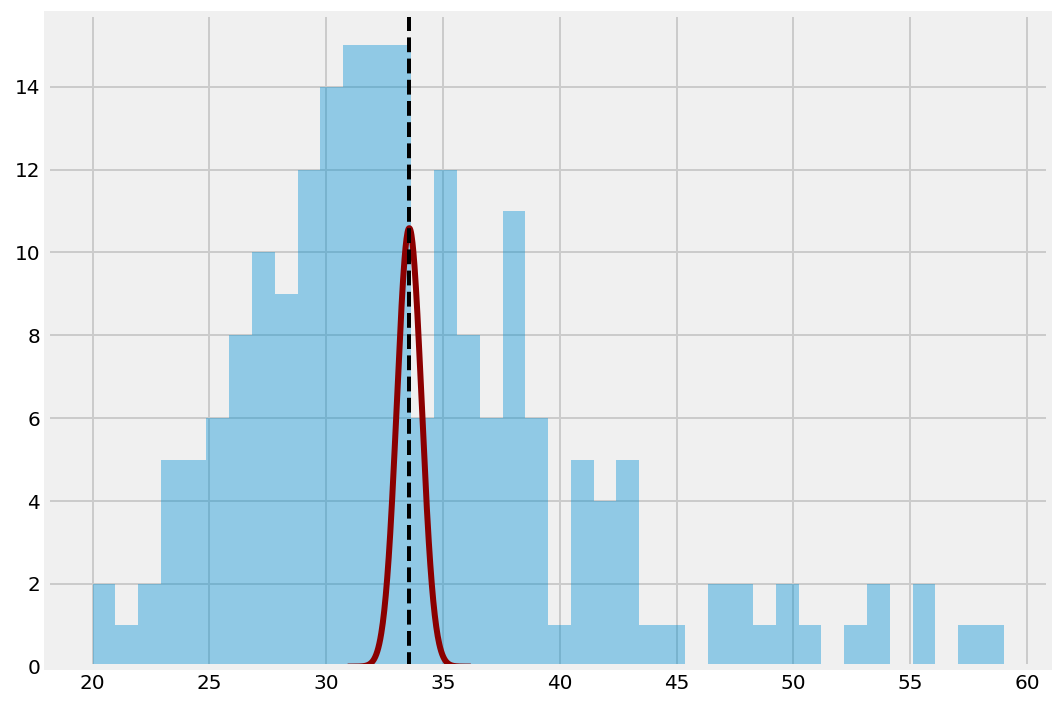

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(single, bins=40, kde=False)
ax.plot(xpoints, ypoints*14, linewidth=3, color='darkred')
ax.axvline(single_mean, linewidth=2, ls='dashed', c='black')

<a id='confidence-intervals'></a>

### Confidence intervals

---

### $$ \text{CI} = \text{point estimate} \pm \text{multiplier} \cdot \text{standard error} \\
\text{CI} = \bar{x} \pm z \cdot \frac{s}{\sqrt{n}}$$

**If we want our confidence level — i.e., how confident we are that the true value of the parameter lies within the confidence interval — to be:**
- **90%**: The z-score multiplier should be **z = 1.645**, because 90% of the area under the $Z ~ N(0, 1)$ normal distribution lies between -1.645 and 1.645.
- **95%**: The z-score multiplier should be **z = 1.96**, because 95% of the area under the $Z ~ N(0, 1)$ normal distribution lies between -1.96 and 1.96.
- **99%**: The z-score multiplier should be **z = 2.575**, because 99% of the area under the $Z ~ N(0, 1)$ normal distribution lies between -2.575 and 2.575.



**The plot below shows these z-score bounds on the $Z ~ N(0, 1)$ distribution:**

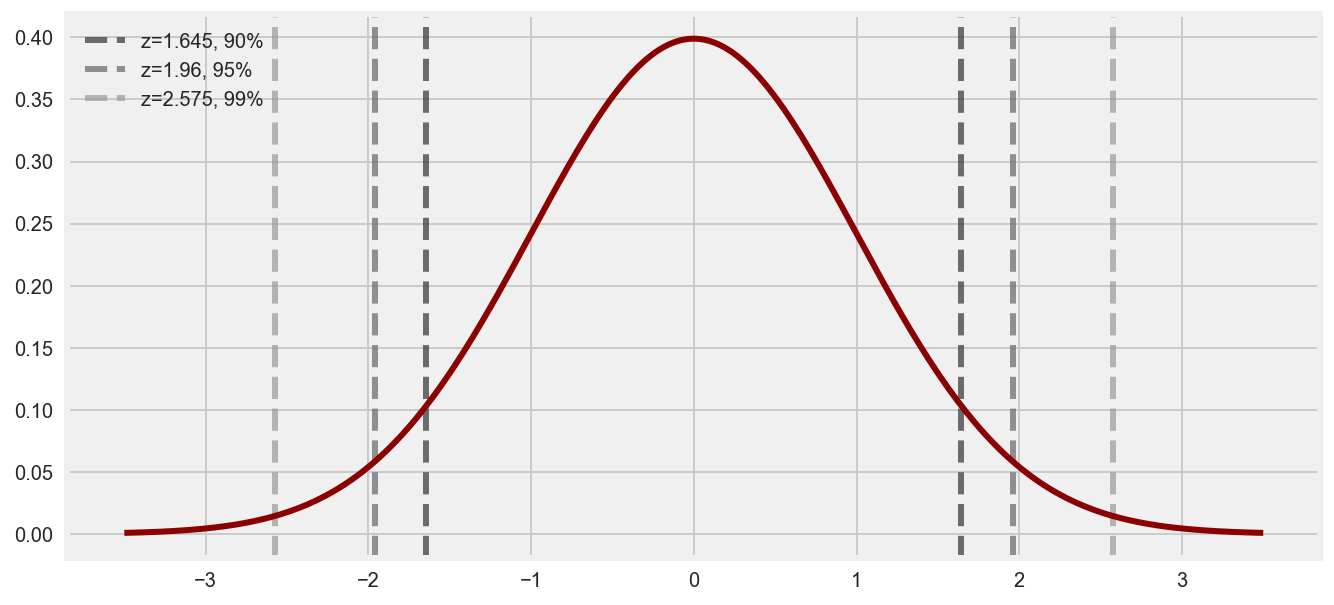

In [8]:
# Initialize a matplotlib "figure:"
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

zx = np.linspace(-3.5, 3.5, 250)

Z = stats.norm(0, 1)
zy = Z.pdf(zx)

# 90%:
ax.axvline(-1.645, ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(1.645, ls='dashed', lw=3, color='#333333', alpha=0.7, label='z=1.645, 90%')

# 95%:
ax.axvline(-1.96, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(1.96, ls='dashed', lw=3, color='#666666', alpha=0.7, label='z=1.96, 95%')

# 99%:
ax.axvline(-2.575, ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(2.575, ls='dashed', lw=3, color='#999999', alpha=0.7, label='z=2.575, 99%')

ax.plot(zx, zy, linewidth=3, color='darkred')
ax.legend(loc='upper left')

In [20]:
# calculate 95% CI for single array
z= 1.96
lower = single_mean - z * single_sem
upper = single_mean + z * single_sem
print(lower, upper)

32.5209539392 34.5890460608


In [24]:
# calculate 95% CI for single array
conf = 0.99
z = np.abs(stats.norm.ppf((1-conf)/2))
print(z)
print(stats.norm.cdf(z))
lower = single_mean - z * single_sem
upper = single_mean + z * single_sem
print(lower, upper)

2.57582930355
0.995
32.1960580895 34.9139419105


In [25]:
# Justin's code 

conf = 0.99
z = np.abs(stats.norm.ppf((1-conf)/2))
print(z)
print(stats.norm.cdf(z))
lower = single_mean - z * single_sem
upper = single_mean + z * single_sem
print(lower, upper)

2.57582930355
0.995
32.1960580895 34.9139419105


<a id='interpreting-ci'></a>

### Interpreting the Confidence Interval

---

Suppose a 95% confidence interval for the mean number of burritos I eat in a week is [2.5, 5.5]. There are two interpretations we can derive from this, and one of them is wrong.


**Interpretation 1 (incorrect):**
> There is a 95% probability that the number of burritos I eat in a week is between 2.5 and 5.5.

**Interpretation 2 (correct):**
 >If we pulled 100 samples and constructed confidence intervals in the same manner, we expect that 95 of the intervals would contain the true mean of  burritos I eat in a week.




Why is interpretation 1 wrong? It assigns a probability to the true value. In Frequentist statistics, the true value is fixed and the data is random. Confidence intervals make a statement of probability about the confidence interval range that could contain the true value.

This is a critical difference in Frequentist statistics (vs. Bayesian); our data has a probability of occuring, but there is no probability regarding possible values for the true parameter.

[This blog post has a great discussion of the difference between the Frequentist confidence interval and the Bayesian credible interval.](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/)

**We can also reframe this statement in terms of the random sampling procedure:**

Typically, you will see confidence intervals expressed as...
> _We are 95% confident that the mean number of burritos I eat each week is between 2.5 and 5.5._

While the above is the common shorthand, we can also think about a supplementary statement...
> _We are also 5% confident that the mean number of burritos I eat each week does not fall in between 2.5 and 5.5. _

**Tip:**  It is the random data and mathmatical process that you are measuring when expressing a confidence interval. 

[This post has more examples and information on the correct way to interpret Confidence Intervals](http://www.mathbootcamps.com/interpreting-confidence-intervals/)